# Nutritional Data Analysis

This notebook analyzes the nutritional content of various foods and provides visualizations for better insights.

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
    

## Load and Inspect the Dataset

In [2]:
file_path = "healthy_foods_for_meal_planning.csv"
data = pd.read_csv(file_path)

data.head(10)
    

,name,serving_size,calories,saturated_fat,protein,carbohydrate,fat,fiber,sugars,saturated_fatty_acids,monounsaturated_fatty_acids,Category,Type
0,"Eggplant, raw",100 g,25,NaN,0.98 g,5.88 g,0.18 g,3.0 g,3.53 g,0.034 g,0.016 g,Vegetables,Eggs (Vegetarian)
1,"Teff, uncooked",100 g,367,0.4g,13.30 g,73.13 g,2.38 g,8.0 g,1.84 g,0.449 g,0.589 g,Carbs,Other
2,"Sherbet, orange",100 g,144,1.2g,1.10 g,30.40 g,2.00 g,1.3 g,24.32 g,1.160 g,0.530 g,Carbs,Other
3,"Cauliflower, raw",100 g,25,0.1g,1.92 g,4.97 g,0.28 g,2.0 g,1.91 g,0.130 g,0.034 g,Vegetables,Vegetables (Vegan)
4,"Taro leaves, raw",100 g,42,0.2g,4.98 g,6.70 g,0.74 g,3.7 g,3.01 g,0.151 g,0.060 g,Vegetables,Vegetables (Vegan)
5,Vegetarian fillets,100 g,290,2.8g,23.00 g,9.00 g,18.00 g,6.1 g,0.80 g,2.849 g,4.376 g,Protein,Other
6,"Mango nectar, canned",100 g,51,NaN,0.11 g,13.12 g,0.06 g,0.3 g,12.45 g,0.014 g,0.022 g,Fruits,Fruits (Vegan)
7,"Crackers, rusk toast",100 g,407,1.4g,13.50 g,72.30 g,7.20 g,0,0,1.376 g,2.755 g,Carbs,Other
8,"Chicken, boiled, feet",100 g,215,3.9g,19.40 g,0.20 g,14.60 g,0.0 g,0.00 g,3.920 g,5.500 g,Protein,Poultry
9,"Quail, raw, meat only",100 g,134,1.3g,21.76 g,0.00 g,4.53 g,0.0 g,0,1.320 g,1.280 g,Protein,Other


## Data Cleaning

In [3]:

def clean_numeric_value(value):
    if pd.isna(value) or value == "":
        return 0.0
    if isinstance(value, (int, float)):
        return float(value)
    match = re.search(r'([\d.]+)', str(value))
    if match:
        return float(match.group(1))
    return 0.0

numeric_columns = ['calories', 'protein', 'carbohydrate', 'fat', 'fiber', 'sugars']
for col in numeric_columns:
    data[col] = data[col].apply(clean_numeric_value)

selected_columns = ['name','calories', 'protein', 'carbohydrate', 'fat', 'fiber', 'sugars', 'Type', 'Category']
data = data[selected_columns]

data.head(10)
    

,name,calories,protein,carbohydrate,fat,fiber,sugars,Type,Category
0,"Eggplant, raw",25.0,0.98,5.88,0.18,3.0,3.53,Eggs (Vegetarian),Vegetables
1,"Teff, uncooked",367.0,13.30,73.13,2.38,8.0,1.84,Other,Carbs
2,"Sherbet, orange",144.0,1.10,30.40,2.00,1.3,24.32,Other,Carbs
3,"Cauliflower, raw",25.0,1.92,4.97,0.28,2.0,1.91,Vegetables (Vegan),Vegetables
4,"Taro leaves, raw",42.0,4.98,6.70,0.74,3.7,3.01,Vegetables (Vegan),Vegetables
5,Vegetarian fillets,290.0,23.00,9.00,18.00,6.1,0.80,Other,Protein
6,"Mango nectar, canned",51.0,0.11,13.12,0.06,0.3,12.45,Fruits (Vegan),Fruits
7,"Crackers, rusk toast",407.0,13.50,72.30,7.20,0.0,0.00,Other,Carbs
8,"Chicken, boiled, feet",215.0,19.40,0.20,14.60,0.0,0.00,Poultry,Protein
9,"Quail, raw, meat only",134.0,21.76,0.00,4.53,0.0,0.00,Other,Protein


## Distribution of Food Categories

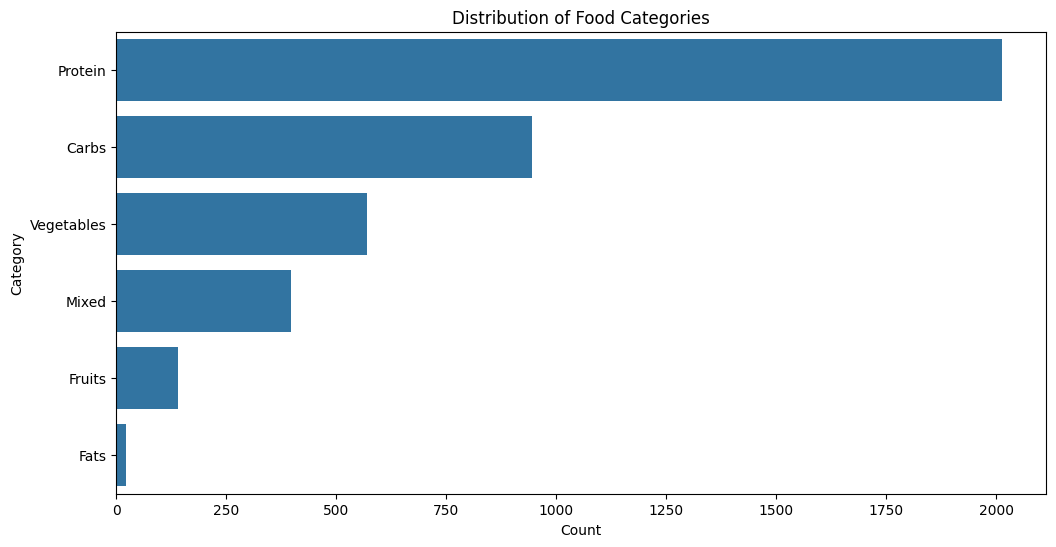

In [4]:

plt.figure(figsize=(12, 6))
sns.countplot(y=data['Category'], order=data['Category'].value_counts().index)
plt.title("Distribution of Food Categories")
plt.xlabel("Count")
plt.ylabel("Category")
plt.show()
    

## Macronutrient Distribution

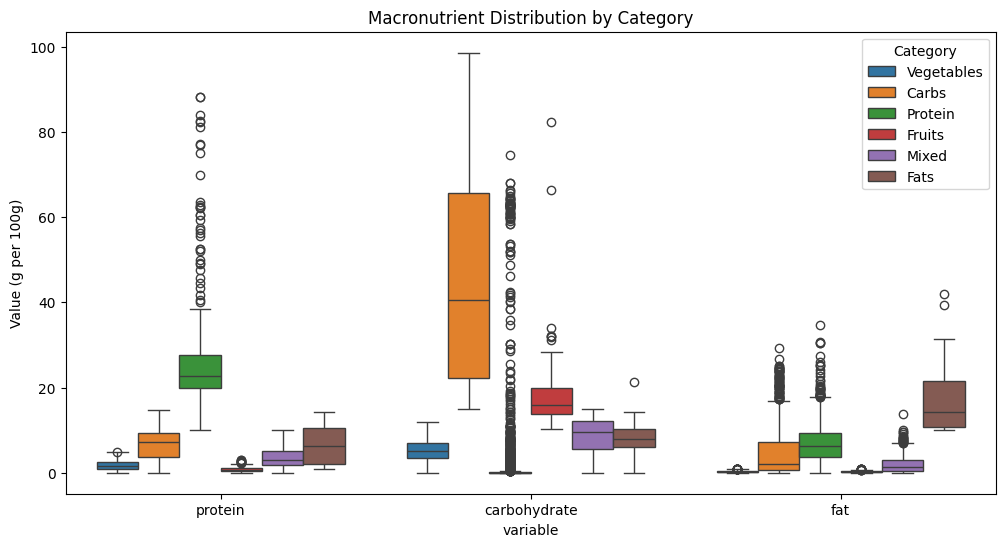

In [5]:

plt.figure(figsize=(12, 6))
data_melted = data.melt(id_vars=['Category'], value_vars=['protein', 'carbohydrate', 'fat'])
sns.boxplot(x='variable', y='value', hue='Category', data=data_melted)
plt.title("Macronutrient Distribution by Category")
plt.ylabel("Value (g per 100g)")
plt.show()
    

## Correlation Heatmap

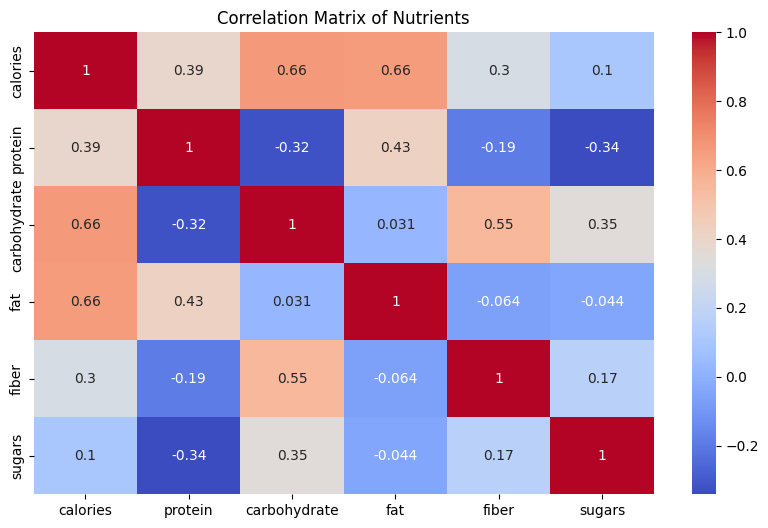

In [6]:

plt.figure(figsize=(10, 6))
sns.heatmap(data[numeric_columns].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Nutrients")
plt.show()
    

## Top 10 High-Protein Foods

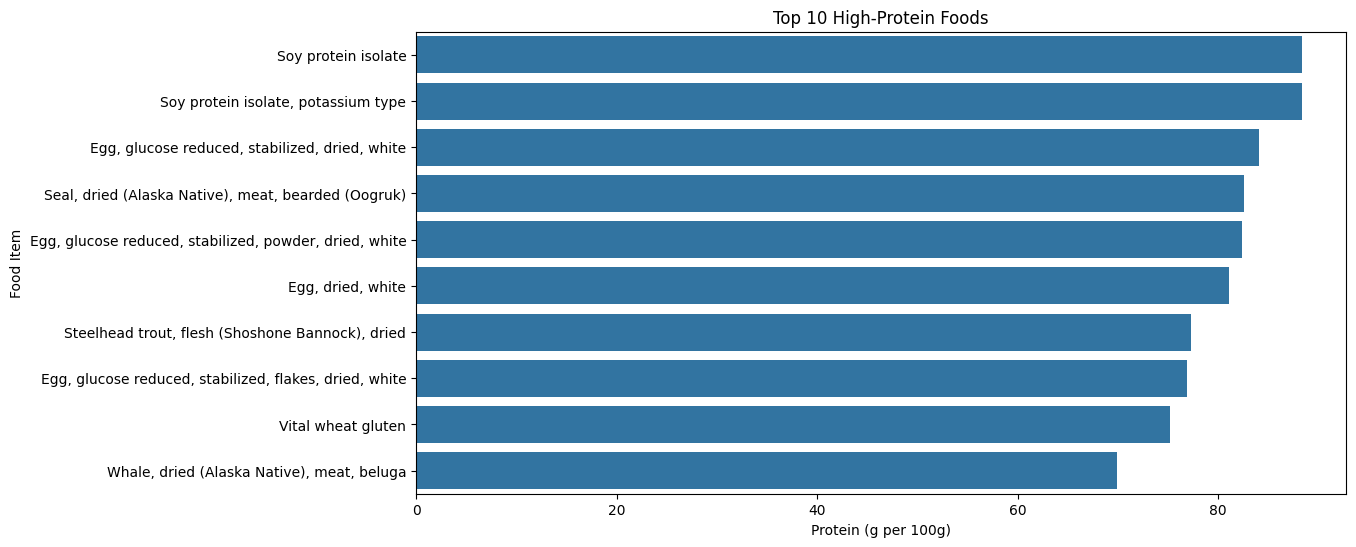

In [7]:

top_protein = data.sort_values(by='protein', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(y=top_protein['name'], x=top_protein['protein'])
plt.title("Top 10 High-Protein Foods")
plt.xlabel("Protein (g per 100g)")
plt.ylabel("Food Item")
plt.show()
    

## Top 10 High-Carbohydrate Foods

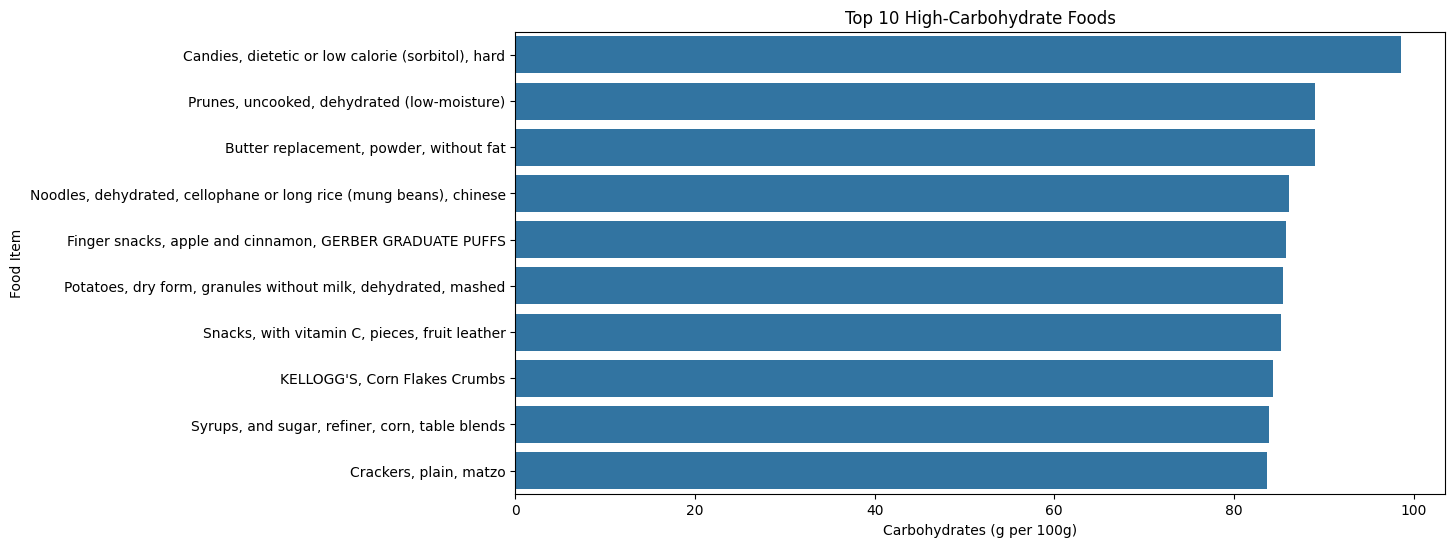

In [8]:

top_carbs = data.sort_values(by='carbohydrate', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(y=top_carbs['name'], x=top_carbs['carbohydrate'])
plt.title("Top 10 High-Carbohydrate Foods")
plt.xlabel("Carbohydrates (g per 100g)")
plt.ylabel("Food Item")
plt.show()
    

## Top 10 High-Fat Foods

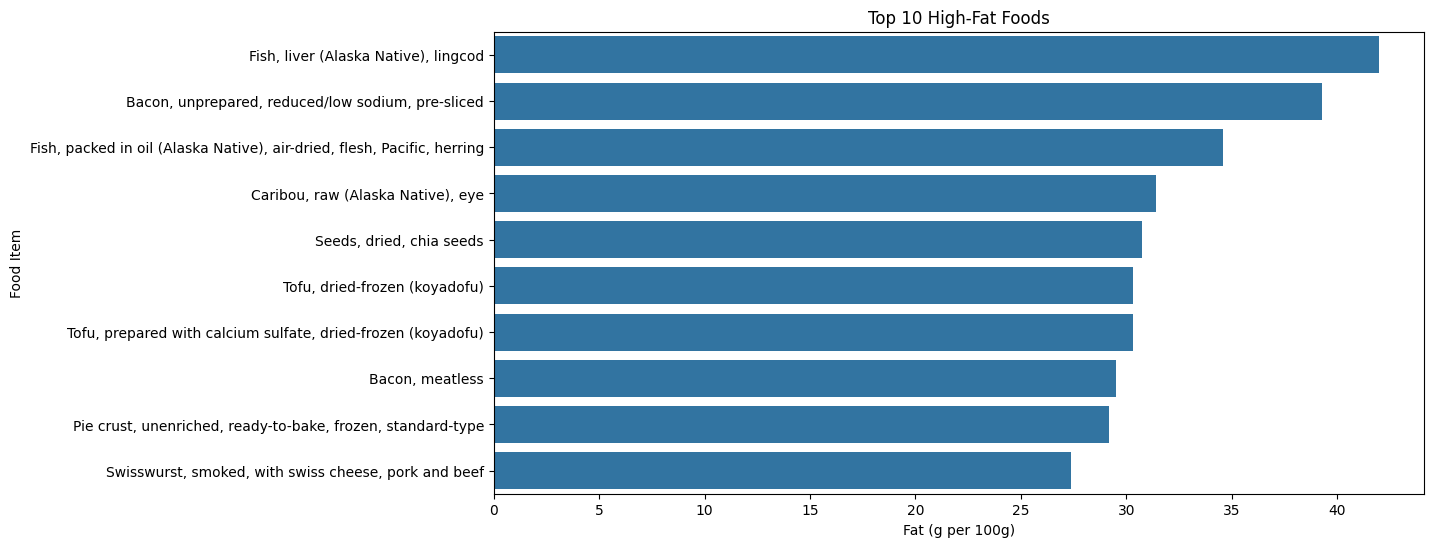

In [9]:

top_fat = data.sort_values(by='fat', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(y=top_fat['name'], x=top_fat['fat'])
plt.title("Top 10 High-Fat Foods")
plt.xlabel("Fat (g per 100g)")
plt.ylabel("Food Item")
plt.show()
    

## Caloric Distribution

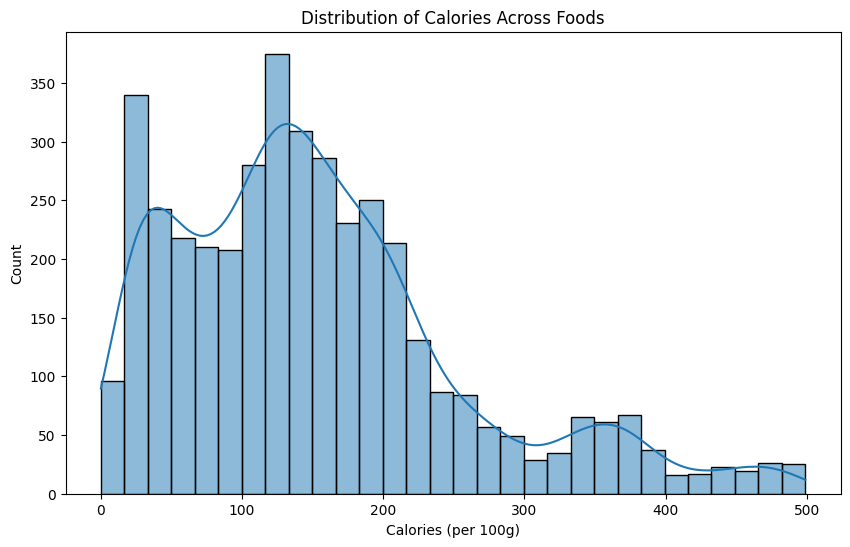

In [10]:

plt.figure(figsize=(10, 6))
sns.histplot(data['calories'], bins=30, kde=True)
plt.title("Distribution of Calories Across Foods")
plt.xlabel("Calories (per 100g)")
plt.ylabel("Count")
plt.show()
    